In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from operator import itemgetter

Задача 1.

Интернет-компания “Шарики к празднику” приняла решение улучшить сайт. Были внесены изменения и заработала новая версия сайта на трёх регионах: ['Северо-запад', 'Урал', 'Центр']. Необходимо понять отличается ли время проведённое на сайте, ДО и ПОСЛЕ внесённых изменений по каждому региону. Для этого написать программу, которая бы выводила р-уровень при сравнении среднего времени, проведённого на сайте, по каждому региону.

Данные из файла data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны три столбца. Названия столбцов - показаны ниже

в первом столбце - время_до
во втором столбце - время_после
в третьем столбце названия регионов - регион

В программе необходимо учесть:

данные распределены не нормально.

Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['регион', 'р-уровень']. Остальные списки - расчёты по каждому региону.

Значение р-уровня округлить до четвёртого знака.

Для расчёта использовать библиотеку scipy.stats

Выходной список списков отсортировать по значению р-уровню в порядке убывания значимости (чем меньше р-уровень, тем выше значимость)

In [2]:
df = pd.read_csv('/Users/solbikn/Desktop/5_1.csv', sep=';', decimal=',', encoding='cp1251')
df.dropna()
df.head()

,время_до,время_после,регион
0,237,240,Северо-запад
1,214,215,Северо-запад
2,202,194,Северо-запад
3,240,229,Северо-запад
4,192,187,Северо-запад


In [3]:
dd = df.copy()

m_test = [['регион', 'р-уровень']]

regions = dd['регион'].unique()

for region in regions:
    region_data = dd[dd['регион'] == region]

    time_before = region_data['время_до'].values
    time_after = region_data['время_после'].values

    stat, p_value = st.mannwhitneyu(time_before, time_after, alternative='two-sided')
    p_value_rounded = round(float(p_value), 4)

    m_test.append([region, p_value_rounded])


m_test = [m_test[0]] + sorted(m_test[1:], key=itemgetter(1))

print(m_test)

[['регион', 'р-уровень'], ['Центр', 0.004], ['Урал', 0.0094], ['Северо-запад', 0.5067]]


Задача 2.

Даны пять показателей здоровья по двум группам пациентов. Все пациенты в таблице записаны по строкам. Разделение по группам происходит с помощью столбца group. Необходимо написать программу, которая бы выводила р-уровень при сравнении всех количественных факторов здоровья по двум группам между собой.

Данные из файла data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны 6 столбцов. Названия столбцов - показаны ниже

в первом столбце group - названия групп
во втором столбце S, мм.кв - показатель здоровья
в третьем столбце Av, мДж/с - показатель здоровья
в четвёртом столбце X, мм - показатель здоровья
в пятом столбце Y, мм - показатель здоровья
в шестом столбце V, мм/с - показатель здоровья

В программе необходимо учесть:

Если данные в обеих группах распределены нормально, то для сравнения использовать метод Стьюдент с различной дисперсией. Если хотя бы в одной группе - не нормальное распределение, то для сравнения использовать метод Манн-Уитни. Для проверки на нормальность использовать метод Шапиро c уровнем принятия решения 0.05.

Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['показатель', 'р-уровень', 'метод расчёта']. Остальные списки - расчёты по каждому фактору.

Значение р-уровня округлить до 4 знака.

Для расчёта использовать библиотеку scipy.stats

Выходной список списков отсортировать по значению р-уровню в порядке убывания значимости (чем меньше р-уровень, тем выше значимость)

In [4]:
df = pd.read_csv('/Users/solbikn/Desktop/5_2.csv', sep=';', decimal=',', encoding='cp1251')
df.head()

,group,"S, мм.кв","Av, мДж/с","X, мм","Y, мм","V, мм/с"
0,group_1,87.4,37.60,1.7,22.6,5.8
1,group_1,44.5,42.44,1.2,22.4,5.2
2,group_1,227.5,95.80,4.0,24.5,11.2
3,group_1,83.3,32.94,1.2,24.6,6.4
4,group_1,122.3,188.92,2.3,24.0,13.2


In [5]:
dd = df.copy()
gr1 = dd[dd['group'] == 'group_1']
gr2 = dd[dd['group'] == 'group_2']
m_test = [['показатель', 'р-уровень', 'метод расчёта']]
self_indicator = [col for col in dd.columns if col != 'group']

for indicator in self_indicator:
    data1 = gr1[indicator].dropna().values
    data2 = gr2[indicator].dropna().values
    if ((st.shapiro(data1)[1] >= 0.05) and (st.shapiro(data2)[1] >= 0.05)):
        _, p_value = st.ttest_ind(gr1, gr2, equal_var=False)
        m_test.append(indicator, round(float(p_value), 4), 'Стьюдент')
    else:
        _, p_value = st.mannwhitneyu(data1, data2, alternative='two-sided')
        m_test.append([indicator, round(float(p_value), 4), 'Манн-Уитни'])

m_test = [m_test[0]] + sorted(m_test[1:], key=itemgetter(1))

print(m_test)

[['показатель', 'р-уровень', 'метод расчёта'], ['V, мм/с', 0.2019, 'Манн-Уитни'], ['Av, мДж/с', 0.202, 'Манн-Уитни'], ['Y, мм ', 0.6069, 'Манн-Уитни'], ['S, мм.кв', 0.9123, 'Манн-Уитни'], ['X, мм', 0.9927, 'Манн-Уитни']]


Задача 3.

Группа медиков изучает, какой тип зондирования при проведении медицинского осмотра пациентов лучше. Исследуется два типа зондирования: Классическое и Двойное эндоскопическое сопровождение . В таблице они обозначены как фактор(столбец) вид_зондирования. Были зафиксированы случаи осложнений по каждому пациенту. В таблицу заносили по каждому типу осложнений, как да или нет (были или не были осложнения после исследования). Всего возможно четыре типа осложнений. В таблице они обозначены как 4 фактора(столбца) ['тип_осложнения_1', 'тип_осложнения_2', 'тип_осложнения_3', 'тип_осложнения_4'].

Данные из файла.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны 6 столбцов. Названия столбцов - показаны ниже

в первом столбце вид_зондирования - названия типа зондирования
во втором столбце время_зондирования, сек - время операции
в третьем столбце тип_осложнения_1 - тип осложнения
в четвёртом столбце тип_осложнения_2 - тип осложнения
в пятом столбце тип_осложнения_3 - тип осложнения
в шестом столбце тип_осложнения_4 - тип осложнения

In [6]:
df = pd.read_csv('/Users/solbikn/Desktop/5_3.csv', sep=';', decimal=',', encoding='cp1251')
df.head()

,вид_зондирования,"время_зондирования, сек",тип_осложнения_1,тип_осложнения_2,тип_осложнения_3,тип_осложнения_4
0,Классическое,69,да,да,да,да
1,Классическое,78,да,да,да,да
2,Классическое,81,да,да,да,да
3,Классическое,56,да,нет,да,да
4,Классическое,82,да,нет,нет,да


In [7]:
dd = df.copy()

nominal_columns = ['тип_осложнения_1', 'тип_осложнения_2', 'тип_осложнения_3', 'тип_осложнения_4']
m_test = [['показатель', 'р-уровень']]
group = 'вид_зондирования'

for column in nominal_columns:
    cross_matrix = pd.crosstab(dd['вид_зондирования'], dd[column])
    _, p_value, _, _ = st.chi2_contingency(cross_matrix, correction=True)                
    m_test.append([column, round(float(p_value), 4)])

m_test = [m_test[0]] + sorted(m_test[1:], key=itemgetter(1))

print(m_test)

[['показатель', 'р-уровень'], ['тип_осложнения_1', 0.0045], ['тип_осложнения_4', 0.3886], ['тип_осложнения_2', 0.4974], ['тип_осложнения_3', 1.0]]


Задача 4.

Даны десять показателей здоровья по двум группам пациентов Группа_1 и Группа_2. Все пациенты в таблице записаны по строкам. Разделение по группам происходит с помощью столбца Группа. Необходимо написать программу, которая бы выводила значение корреляции и р-уровень в Группе_1 по каждой паре количественных факторов из исходной таблицы.

Данные из файла data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны 11 столбцов. Названия столбцов - показаны ниже

в первом столбце группа - группы пациентов
во втором столбце К - показатель здоровья
в третьем столбце Ca - показатель здоровья
в четвёртом столбце V - показатель здоровья
в пятом столбце Cd - показатель здоровья
в шестом столбце I - показатель здоровья
в седьмом столбце Pb - показатель здоровья
в восьмом столбце Q39_Corineform - показатель здоровья
в девятом столбце Q56_Pseudonocardia - показатель здоровья
в десятом столбце Q56Общеекол-во_МО - показатель здоровья
в одиннадцатом столбце Q57Плазмологенмкг/мл - показатель здоровья

В программе необходимо учесть:

Если данные в обоих сравниваемых факторов распределены нормально, то для сравнения использовать метод корреляции Пирсон. Если хотя бы в одном факторе - не нормальное распределение, то для расчёта корреляции использовать метод Спирмен. Для проверки на нормальность использовать метод Шапиро c уровнем принятия решения 0.05.

Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции']. Остальные списки - расчёты по каждому фактору.

Значение р-уровня округлить до четвёртого знака.

Значение корреляции округлить до второго знака.

Вывести только те расчёты, у которых р-уровень меньше 0.05

Корреляцию показателя самого с собой - не выводить.

Дублирование строк - исключить. (дублирование это: влияние 'xy' равно влиянию 'yx')

Для расчёта использовать библиотеку scipy.stats

Итоговый список списков отсортировать по значению корреляции в порядке убывания значимости (чем меньше р-уровень, тем выше значимость)

In [8]:
df = pd.read_csv('/Users/solbikn/Desktop/5_4.csv', sep=';', decimal=',', encoding='cp1251')
df.head()

,Группа,K,Ca,V,Cd,I,Pb,Q39_Corineform,Q56_Pseudonocardia,Q56_Общее_кол-во_МО,Q57_Плазмологен_мкг/мл
0,Группа_2,37.02,2287.91,0.006,0.06,0.021,0.19,282,32,28456,84.73
1,Группа_2,218.85,3187.86,0.069,0.09,0.056,0.39,367,55,31199,4.19
2,Группа_2,428.57,1710.23,0.009,0.03,0.758,0.59,504,86,42251,18.36
3,Группа_2,35.58,1621.30,0.005,0.02,0.100,0.11,420,56,46123,58.54
4,Группа_2,67.70,2794.79,0.006,0.11,0.188,0.18,222,27,32185,47.28


In [9]:
dd = df.copy()
gr1 = dd[dd['Группа'] == 'Группа_1']
nominal_columns = [
    'K', 'Ca', 'V', 'Cd', 'I', 'Pb', 'Q39_Corineform', 
    'Q56_Pseudonocardia', 'Q56_Общее_кол-во_МО', 'Q57_Плазмологен_мкг/мл'
]
m_test = [
    ['показатель 1', 'показатель 2', 'значение корреляции', 
     'р-уровень', 'метод корреляции']
]

for i in range(len(nominal_columns)):
    for j in range(i + 1, len(nominal_columns)):
        indicator1 = nominal_columns[i]
        indicator2 = nominal_columns[j]

        data1 = gr1[indicator1].dropna().values
        data2 = gr1[indicator2].dropna().values
        
        shapiro1 = st.shapiro(data1)[1] > 0.05
        shapiro2 = st.shapiro(data2)[1] > 0.05
        
        if shapiro1 and shapiro2:
            corr, p_value = st.pearsonr(data1, data2)
            method = 'Пирсон'
        else:
            corr, p_value = st.spearmanr(data1, data2)
            method = 'Спирмен'
        
        if float(p_value) < 0.05:
            m_test.append([
                indicator1, 
                indicator2, 
                round(float(corr), 2), 
                round(float(p_value), 4), 
                method
            ])

m_test = [m_test[0]] + sorted(m_test[1:], key=itemgetter(2), reverse=True)

print(m_test)

[['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции'], ['Q39_Corineform', 'Q56_Общее_кол-во_МО', 0.73, 0.0, 'Спирмен'], ['Q56_Pseudonocardia', 'Q56_Общее_кол-во_МО', 0.61, 0.0001, 'Спирмен'], ['Q39_Corineform', 'Q56_Pseudonocardia', 0.58, 0.0002, 'Спирмен'], ['K', 'V', 0.54, 0.0008, 'Спирмен'], ['V', 'Cd', 0.48, 0.0036, 'Спирмен'], ['Q56_Pseudonocardia', 'Q57_Плазмологен_мкг/мл', 0.37, 0.0276, 'Пирсон'], ['Ca', 'Q57_Плазмологен_мкг/мл', 0.35, 0.0415, 'Пирсон'], ['Cd', 'Q56_Pseudonocardia', -0.37, 0.0292, 'Спирмен'], ['V', 'Q39_Corineform', -0.42, 0.0123, 'Спирмен'], ['V', 'Q56_Общее_кол-во_МО', -0.43, 0.0099, 'Спирмен'], ['I', 'Q39_Corineform', -0.46, 0.0052, 'Спирмен'], ['Cd', 'Q56_Общее_кол-во_МО', -0.5, 0.0025, 'Спирмен'], ['Cd', 'Q39_Corineform', -0.61, 0.0001, 'Спирмен']]


Задача 5.

Перед вами данные, как и в первой задаче.
Там речь шла об интернет-компании “Шарики к празднику”.
Она внедряла улучшения в дизайне сайта. Новая версия сайта работала на трёх регионах: ['Северо-запад', 'Урал', 'Центр'].

В исходной таблице три столбца: время_до, время_после, регион

Построить график "ящик с усами" по факторам время_до, время_после.
Необходимо учесть:

Два ящика выводить на одном графике;
Сделать код, который бы строил график по одному региону. Регион вводится;
Параметры графика оставить по умолчанию.

In [10]:
df = pd.read_csv('/Users/solbikn/Desktop/5_1.csv', sep=';', decimal=',', encoding='cp1251')
df.head()

,время_до,время_после,регион
0,237,240,Северо-запад
1,214,215,Северо-запад
2,202,194,Северо-запад
3,240,229,Северо-запад
4,192,187,Северо-запад


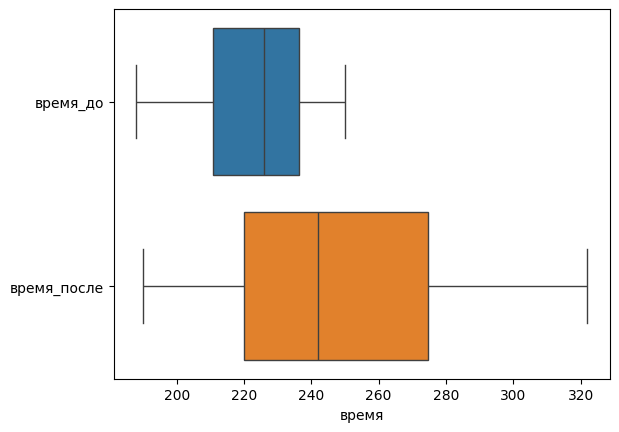

In [11]:
region = input()

region_data = df[df['регион'] == region]

sns.boxplot(data=region_data[['время_до', 'время_после']], orient='h')
plt.xlabel('время')
plt.yticks([0, 1], ['время_до', 'время_после'])

plt.show()